In [161]:
import numpy as np
import scipy
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import astropy
from astropy import constants as c,units as u

In [146]:
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')

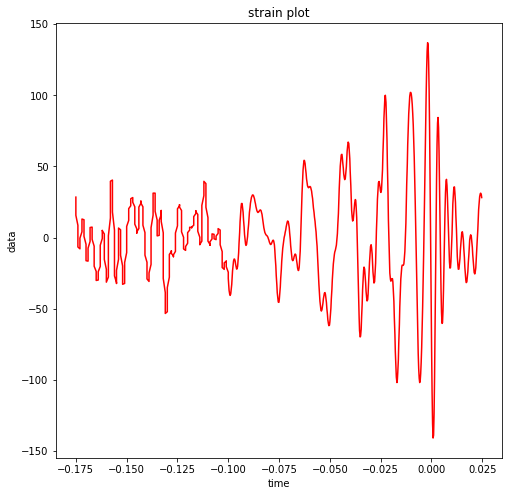

In [147]:
plt.figure(figsize=(8,8))
plt.plot(time,data,c='r')
plt.xlabel('time')
plt.ylabel('data')
plt.title('strain plot')
plt.show()

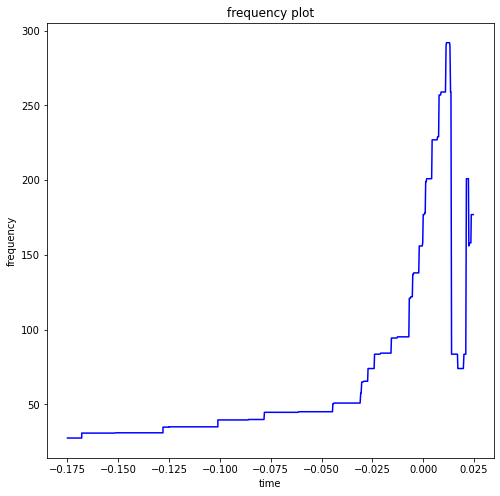

In [148]:
plt.figure(figsize=(8,8))
plt.plot(time,freq,c='b')
plt.xlabel('time')
plt.ylabel('frequency')
plt.title('frequency plot')
plt.show()

In [149]:
index=[]
for i, _ in enumerate(data): 
    if i+1 < len(data): 
        if data[i]*data[i+1]<0:
            index.append(i)
print(len(index))

52


In [150]:
time_z=[]
freq_z=[]
for i in index:
        time_z.append(time[i])
        freq_z.append(freq[i])

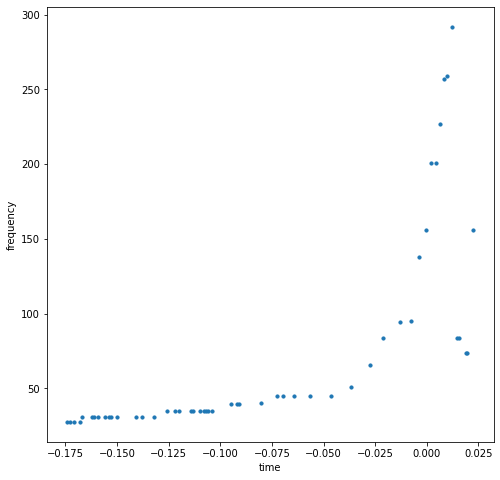

In [151]:
plt.figure(figsize=(8,8))
plt.scatter(time_z,freq_z,s=10)
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [152]:
time_z=np.asarray(time_z)
freq_z=np.asarray(freq_z)
for i in range(52):
    if(time_z[i]<=0 and freq_z[i]>=50):
        print (i)

34
35
36
37
38
39
40


In [166]:
idx=[34,35,36,37,38,39,40]
idx=np.asarray(idx)

In [154]:
freq_n=freq_z[idx]
time_n=time_z[idx]
print(freq_n,time_n)

[ 50.9  65.5  83.6  94.4  95.2 138.  156. ] [-0.0366  -0.0273  -0.0212  -0.0129  -0.00776 -0.00386 -0.00044]


In [158]:
time_c=time_n*(-1)
freq_c=freq_n**(-8/3)
def f(x,m):
    return (x*m)
p_opt,p_cov=cf(f,time_c,freq_c)
print(p_opt)

[0.00061165]


In [163]:
M_chirp=(((5*p_opt)**(3/5)*c.c**3)/(c.G*(8*np.pi)**(8/5)))*u.second
print(M_chirp)

[7.19374233e+31] kg


In [165]:
ratio=M_chirp/c.M_sun
print(ratio)

[36.17836761]
